# Деревья решений
![tree](../pics/ad46dbb447cd0e9a6aeecd64cc2bd332b0cbcb79.jpeg)

### Что это?
* Алгоритм обучения с учителем
* Древовидная структура данных, подобная блок-схеме
* Каждая нода это **признак**
* Каждое ребро это **правило**
* Каждый лист это результат

In [66]:
import numpy as np
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt

In [67]:
np.random.seed(49)

In [68]:
X = np.random.random(size=(20, ))
y = np.random.randint(0, 2, size=(20, ))

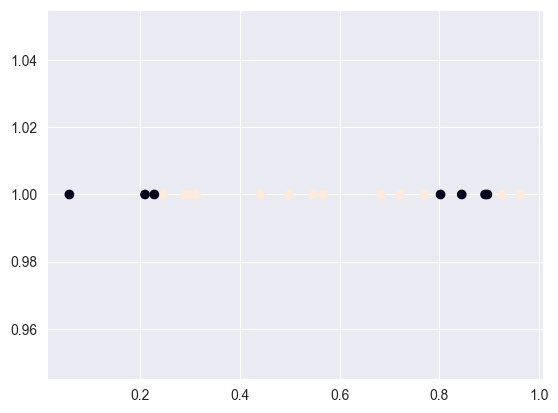

In [69]:
plt.scatter(X, np.ones_like(X), c=y)

Энтропия Шеннона

$$ H = -\sum_{i}{p_i log_{2}{p_i}} $$

In [70]:
def entropy(p):
    # Convert values to probability
    p = np.bincount(p) / float(p.shape[0])

    ep = st.entropy(p)
    if ep == -float("inf"):
        return 0.0
    return ep

In [71]:
x_sorted_ind = X.argsort()
y = y[x_sorted_ind]
X.sort()

initial_entropy = entropy(y)

In [72]:
initial_entropy

0.6474466390346325

$$ IG = H(x) - H(x|\text{left})*w_1 - H(x|\text{right})*w_2$$

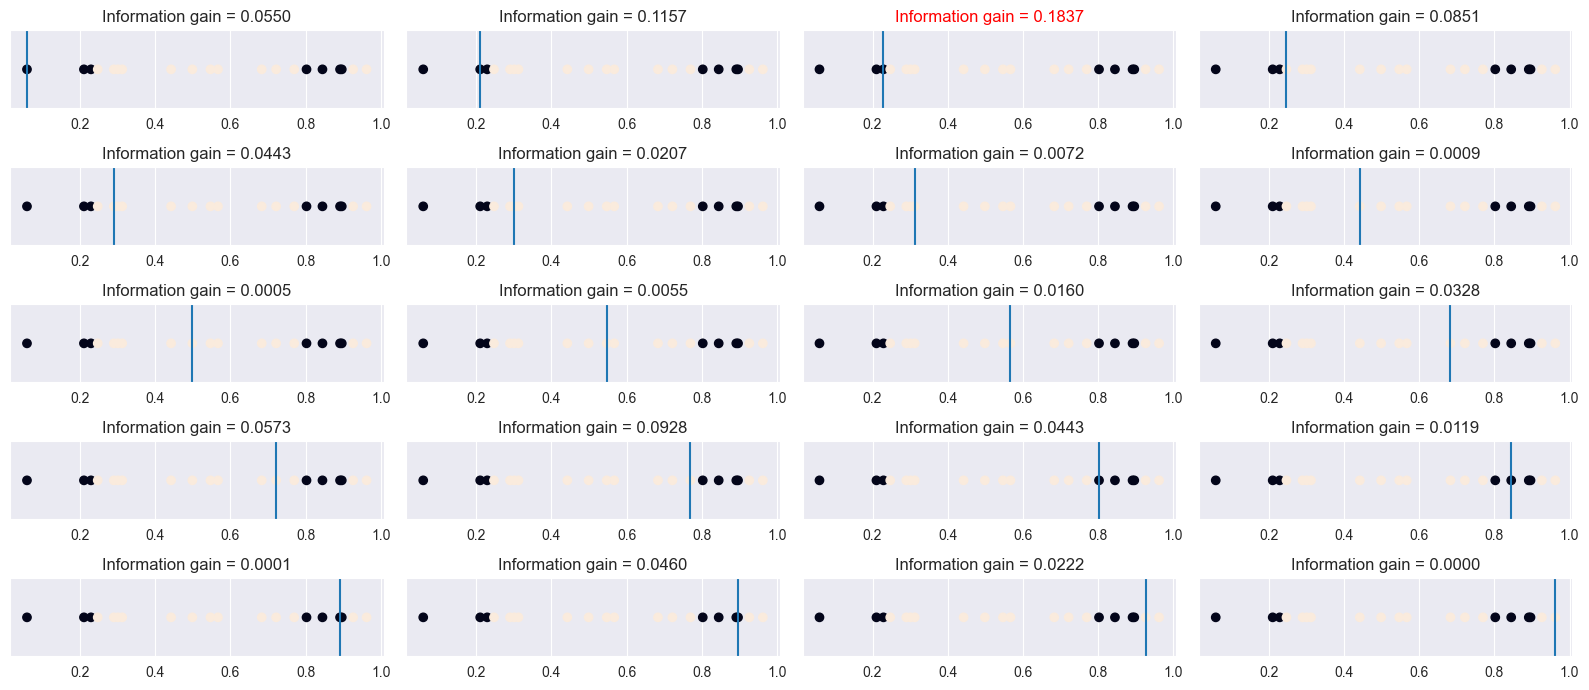

In [73]:
fig, axes = plt.subplots(5, 4, figsize=(16, 7))
max_ig = float('-inf')
max_ind = -1
for i, split in enumerate(X):
    # Calculate right part
    right_y = y[X <= split]
    right_entropy = entropy(right_y)
    right_weight = right_y.shape[0] / y.shape[0]

    # Calculate left part
    left_y = y[X > split]
    left_entropy = entropy(left_y)
    left_weight = left_y.shape[0] / y.shape[0]

    # Calculate IG and max IG
    information_gain = initial_entropy - right_weight * right_entropy - left_weight * left_entropy 
    if information_gain > max_ig:
        max_ig = information_gain
        max_ind = i

    # Plot
    axes[i // 4, i % 4].scatter(X, np.ones_like(X), c=y, marker='o')
    axes[i // 4, i % 4].axvline(split)
    axes[i // 4, i % 4].set_title(f'Information gain = {information_gain:.4f}')
    axes[i // 4, i % 4].set_yticks([])
    # axes[i // 4, i % 4].set_xticks([])

# Highlight max iG
axes[max_ind // 4, max_ind % 4].set_title(f'Information gain = {max_ig:.4f}', color='red')

fig.tight_layout()

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [75]:
clf = DecisionTreeClassifier(criterion='entropy')

In [76]:
clf.fit(X.reshape((-1, 1)), y)

DecisionTreeClassifier(criterion='entropy')

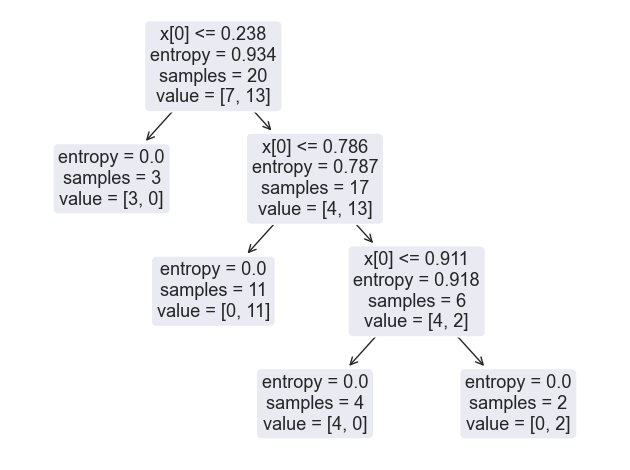

In [77]:
plot_tree(clf, rounded=True,)
plt.tight_layout()

# Оценка важности фичей

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [15]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
clf = DecisionTreeClassifier(criterion='entropy')

In [82]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [83]:
for i, (feature, importance) in enumerate(zip(clf.feature_names_in_, clf.feature_importances_)):
    if importance > 0:
        print(f'Feature \"{feature}\" with number {i} has importance {importance:.4f}')

Feature "mean radius" with number 0 has importance 0.0080
Feature "mean texture" with number 1 has importance 0.0051
Feature "mean smoothness" with number 4 has importance 0.0074
Feature "area error" with number 13 has importance 0.0176
Feature "symmetry error" with number 18 has importance 0.0109
Feature "worst texture" with number 21 has importance 0.0569
Feature "worst perimeter" with number 22 has importance 0.6859
Feature "worst area" with number 23 has importance 0.0320
Feature "worst smoothness" with number 24 has importance 0.0684
Feature "worst concave points" with number 27 has importance 0.0770
Feature "worst symmetry" with number 28 has importance 0.0173
Feature "worst fractal dimension" with number 29 has importance 0.0135


[Text(0.54, 0.9375, 'x[22] <= 105.95\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]'),
 Text(0.3, 0.8125, 'x[27] <= 0.135\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]'),
 Text(0.16, 0.6875, 'x[13] <= 48.975\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]'),
 Text(0.08, 0.5625, 'x[21] <= 30.145\nentropy = 0.055\nsamples = 316\nvalue = [2, 314]'),
 Text(0.04, 0.4375, 'entropy = 0.0\nsamples = 274\nvalue = [0, 274]'),
 Text(0.12, 0.4375, 'x[23] <= 775.95\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.08, 0.3125, 'x[23] <= 643.25\nentropy = 0.165\nsamples = 41\nvalue = [1, 40]'),
 Text(0.04, 0.1875, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.12, 0.1875, 'x[0] <= 13.075\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.08, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.0625, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.16, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.5625, 'x[4] <= 0.091\ne

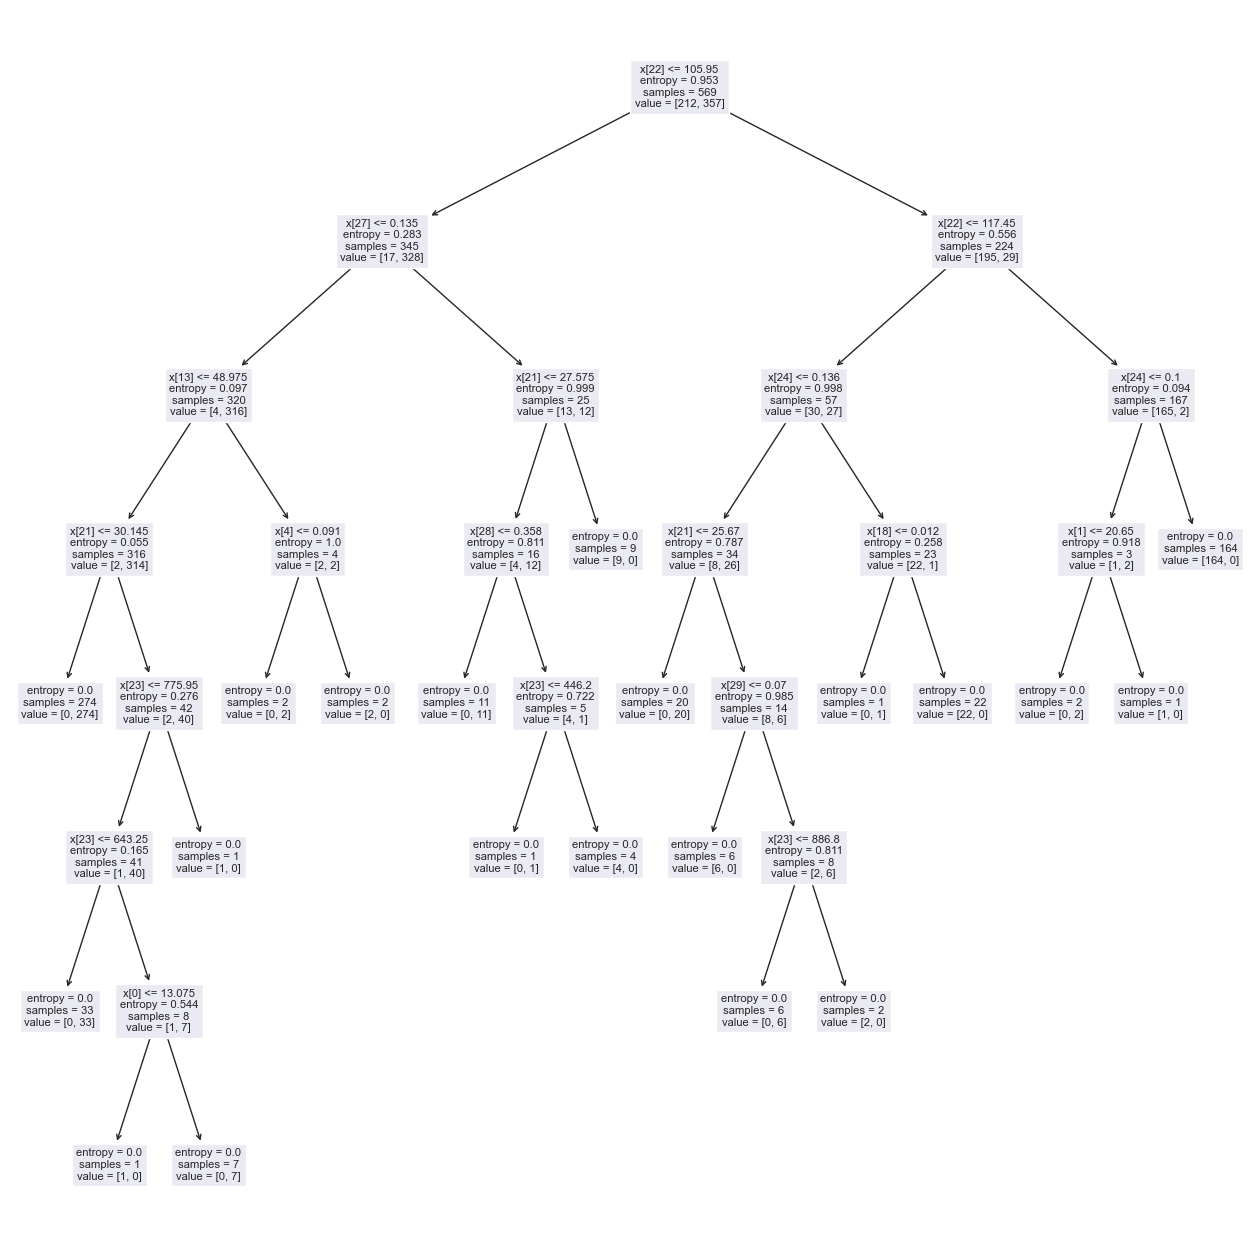

In [84]:
plt.figure(figsize=(16, 16))

plot_tree(clf)

### Задача

Columns:

* **age:** continuous.  
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
* **fnlwgt:** continuous.  
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
* **education-num**: continuous.  
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
* **sex**: Female, Male.  
* **capital-gain**: continuous.  
* **capital-loss**: continuous.  
* **hours-per-week**: continuous.  
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  

Target:
* **income**: <=50K, <50K

In [87]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]

In [88]:
data = pd.read_csv('adult/adult.data', sep=', ', names=names, index_col=False)
data.head()

/var/folders/dv/l5yj1vt95y51qzyhmdns2cgw0000gn/T/ipykernel_65863/731006912.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('adult/adult.data', sep=', ', names=names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [89]:
X, y = data.drop(columns=['income']), data['income']

In [90]:
X.groupby(['education'])['education-num'].mean()

education
10th             6.0
11th             7.0
12th             8.0
1st-4th          2.0
5th-6th          3.0
7th-8th          4.0
9th              5.0
Assoc-acdm      12.0
Assoc-voc       11.0
Bachelors       13.0
Doctorate       16.0
HS-grad          9.0
Masters         14.0
Preschool        1.0
Prof-school     15.0
Some-college    10.0
Name: education-num, dtype: float64

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [92]:
X['hours-per-week'].value_counts()

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [93]:
X.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
dtype: int64

In [94]:
y = y.replace({'<=50K': 1, '>50K': 0})

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [97]:
encode = ColumnTransformer([
    # Ordinal Encoder кодирует категории числами
    ('text2int', OrdinalEncoder(), ['workclass', 'education', 'marital-status', 
                                    'occupation', 'race', 'sex', 'native-country']),

    # Увеличиваем стабильность дерева с помощью нормализации данных
    ('scale', StandardScaler(), ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']),
], remainder='drop')

In [98]:
pipe = Pipeline([
    ('preprocess', encode),
    # Возможные гиперпараметры дерева можно посмотреть вот тут
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    # Из основного
    # criterion - критерий. Либо энтропия, либо Джини
    # max_depth - максимальная глубина. Прунинг
    # min_samples_split - минимальное количество наблюдений для того, чтобы провести разбиение.
    #                     Если наблюдений в сабсемпле меньше, чем min_samples_split, не разбиваем
    # min_samples_leaf - минимальное число наблюдений, которое может попасть в лист
    # max_features - максимальное количество фичей, используемых при выборе оптимального разбиения
    # max_leaf_nodes - максимальное кол-во листов в результирующем дереве. Очень опасный гиперпараметр
    # min_impurity_decrease - минимальное значение IG, при котором проводится сплит.
    #                         Если значение IG меньше, чем min_impurity_decrease, то не разбиваем
    # class_weight - априорные вероятности классов.
    #                Если не задано, то 50/50.
    #                Если balanced, то берется из обучающей выборки.
    #                Если явно задано вектором, то берется заданное
    # ccp_alpha - критерий автоматической подрезки для реализации CART.
    ('classify', DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_split=20, min_samples_leaf=10))
])

# Гиперпараметры можно подбирать по кросс валидации и GridSearch как и везде

In [105]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('text2int', OrdinalEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'race', 'sex',
                                                   'native-country']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classify',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        min_samples_leaf=10,
                                        min_samples_split=20))])

In [106]:
preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

In [107]:
f1_score(y_train, preds_train)

0.9171586764281404

In [108]:
f1_score(y_test, preds_test)

0.9007789755291525

[Text(0.6431818181818182, 0.9285714285714286, 'x[2] <= 2.5\nentropy = 0.796\nsamples = 24420\nvalue = [5881, 18539]'),
 Text(0.4022727272727273, 0.7857142857142857, 'x[9] <= 0.56\nentropy = 0.949\nsamples = 14576\nvalue = [5369, 9207]'),
 Text(0.2318181818181818, 0.6428571428571429, 'x[2] <= 0.5\nentropy = 0.908\nsamples = 13551\nvalue = [4377, 9174]'),
 Text(0.1, 0.5, 'x[11] <= 0.328\nentropy = 0.399\nsamples = 3215\nvalue = [254, 2961]'),
 Text(0.05454545454545454, 0.35714285714285715, 'x[10] <= 5.368\nentropy = 0.267\nsamples = 2390\nvalue = [109, 2281]'),
 Text(0.03636363636363636, 0.21428571428571427, 'x[3] <= 9.5\nentropy = 0.252\nsamples = 2377\nvalue = [100, 2277]'),
 Text(0.01818181818181818, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05454545454545454, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.07272727272727272, 0.21428571428571427, 'entropy = 0.89\nsamples = 13\nvalue = [9, 4]'),
 Text(0.14545454545454545, 0.35714285714285715, 'x[3] <= 2.0\nentropy = 0.671\nsamples 

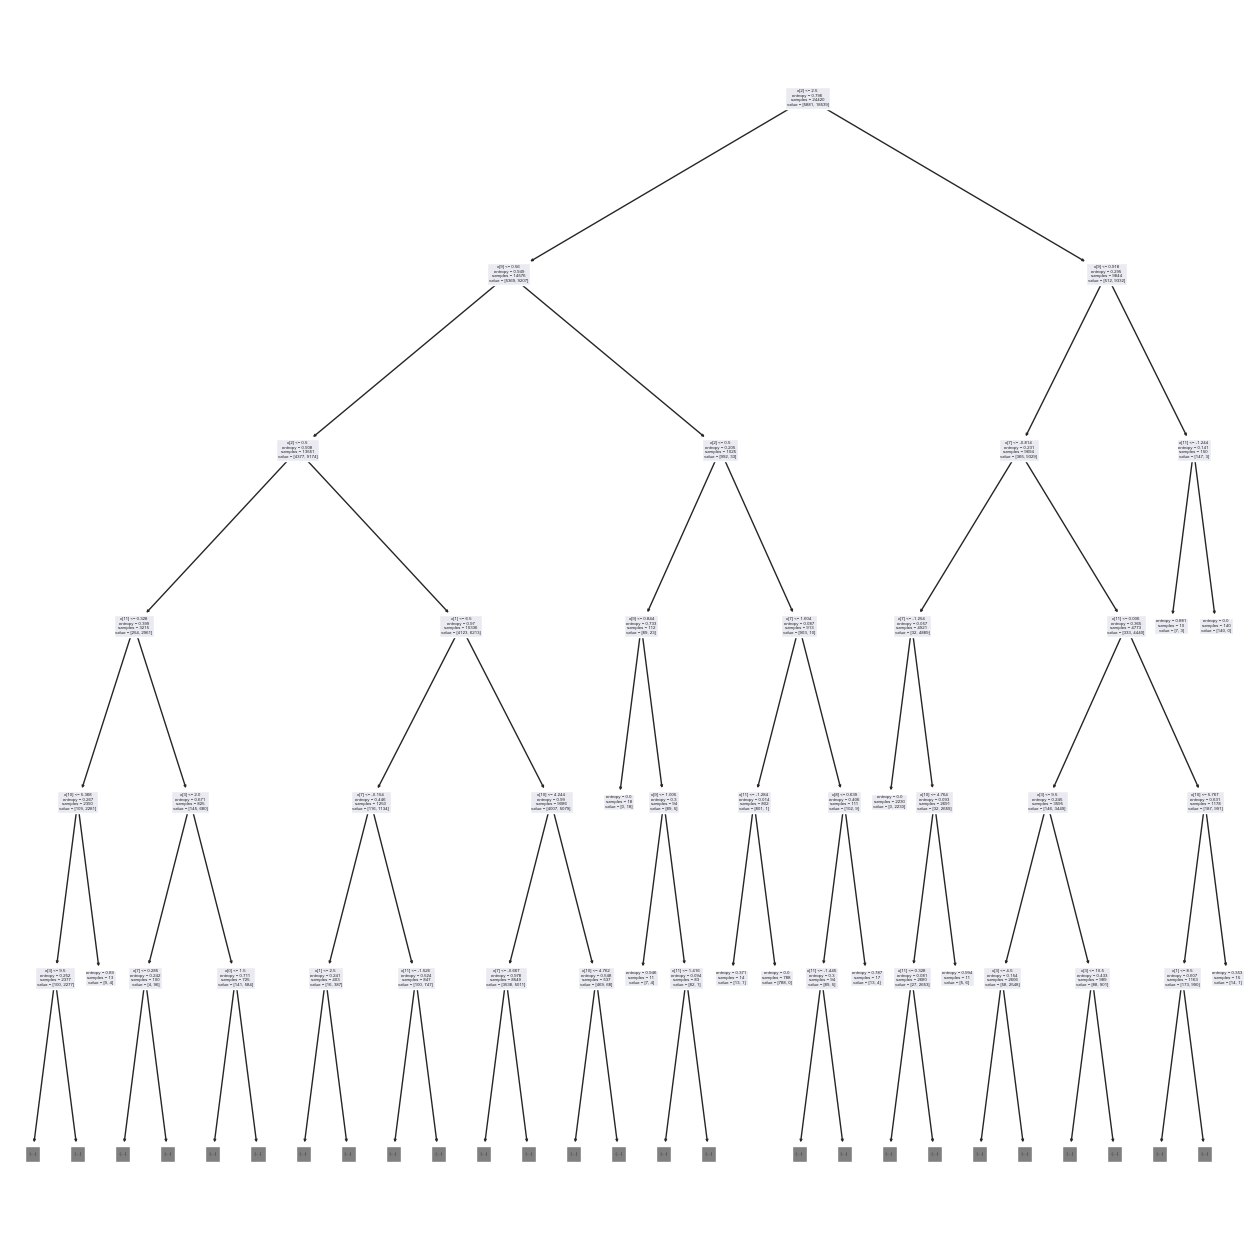

In [109]:
plt.figure(figsize=(16, 16))
plot_tree(pipe['classify'], max_depth=5)

In [110]:
pipe['classify'].tree_.max_depth

15

In [111]:
pipe['classify'].feature_importances_

array([0.01036726, 0.12254687, 0.3526565 , 0.04480955, 0.00457689,
       0.00900973, 0.00329404, 0.09497862, 0.04996624, 0.19605249,
       0.05989902, 0.0518428 ])

In [114]:
pipe['classify'].feature_importances_.argmax()


2